![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Matemática Computacional

## Soluções de Equações

- Professor: Felipe Reis


In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from scipy import optimize

### Aplicação do Teorema de Bolzano

Consideremos a equação  $e^x = x + 2$.

Esta equação é é equivalente a resolver $f(x)= e^x - x - 2$.

Como $f(-2) > 0$ e $f(0)<0$, pelo Teorema de Bolzano, temos que existe pelo menos um zero de $f(x)$ no intervalo (−2, 0). E, portanto, existe pelo menos uma solução da equação dada no intervalo (−2, 0).

Verifique essa aplicação no código abaixo

In [8]:
def f(x): 
    return np.exp(x)-x-2

In [20]:
print(f(-2), f(0))

0.1353352832366128 -1.0


Podemos verificar o sinal da multiplicação de $f(0) \times f(-2)$ usando o comando abaixo.

Verifique mais informações sobre o comando em:

* https://numpy.org/doc/stable/reference/generated/numpy.sign.html?highlight=numpy.sign#numpy.sign

In [18]:
np.sign(f(-2)*f(0))

-1.0

Podemos plotar a curva da a curva da função, no intervalo (-2,0) usando os comandos abaixo.

In [25]:
interv = np.linspace(-2,0)

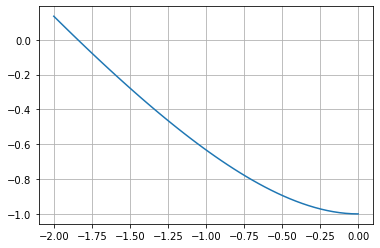

In [26]:
plt.plot(interv, f(interv))
plt.grid(); 
plt.show()

### Proposição - Corolário do Teorema de Bolzano

Consideremos $e^x-1$ a derivada da equação  $e^x = x + 2$.

Podemos plotar a curva da a curva da função, no intervalo (-2,0) usando os comandos abaixo.

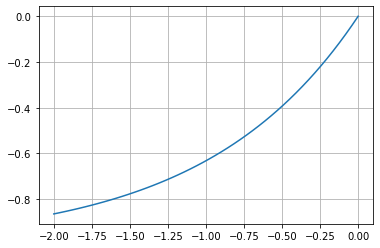

In [27]:
def f_dev(x): 
    return np.exp(x)-1

plt.plot(interv, f_dev(interv))
plt.grid(); 
plt.show()

### Análise Gráfica

Suponha a equação abaixo. Faça análise das possível raízes da equação.

* $f(x) = x^5 - 8x^4 + 5x^3 + 3x + 1$

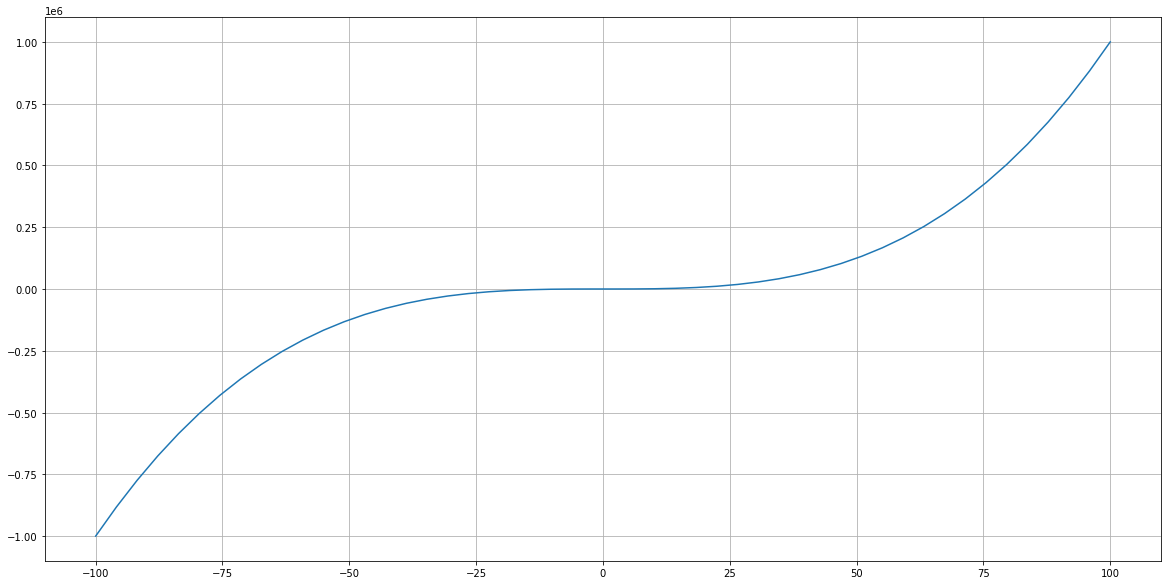

In [44]:
def f(x):
    return (x**3) - (9*x) + 3

interv = np.linspace(-100,100)

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(interv, f(interv))
plt.grid(); 
plt.show()

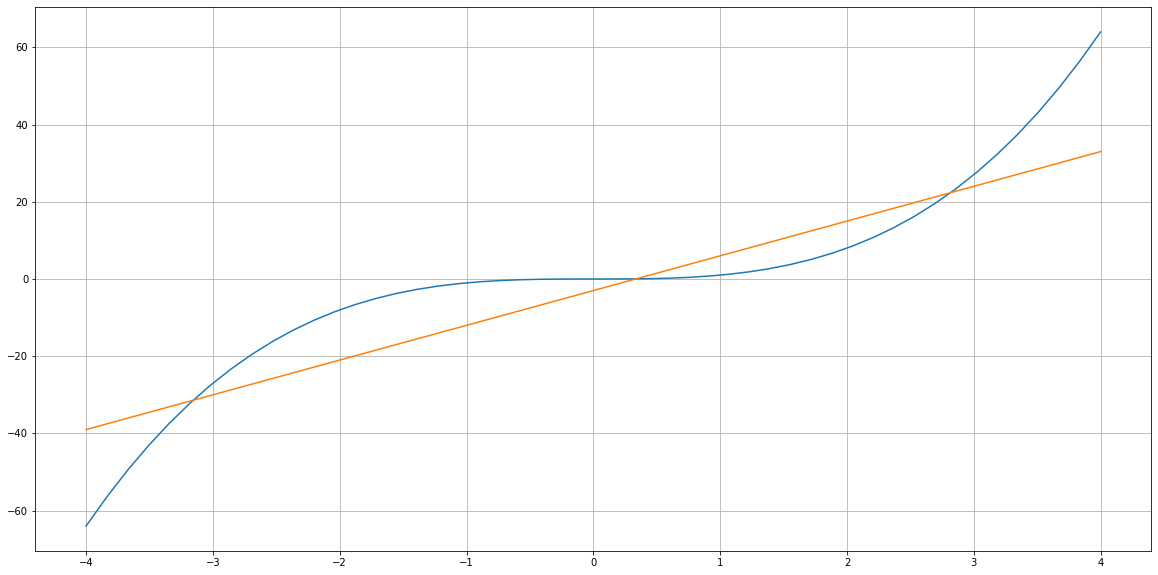

In [37]:
def f1(x):
    return (x**3)

def f2(x):
    return (9*x) - 3

interv = np.linspace(-4,4)

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(interv, f1(interv))
plt.plot(interv, f2(interv))
plt.grid(); 
plt.show()

### Método da Bissecção

In [38]:
def f(x):
    return (x**3) - (9*x) + 3

#função com o método da bissecção
#parâmetros de entrada
# * f - função objetivo
# * a - extremo esquerdo do intervalo de inspeção [a, b]
# * b - extremo direito do intervalo de inspeção [a, b]
# * TOL - tolerância para o erro absoluto (critério de parada)
# * N - número máximo de iterações depois da aproximação inicial
# parâmetros de saída
# p - aproximação de uma raiz x ∗ de f, satisfazendo |p−x ∗ | < T OL ou f (p) = 0.

def bissecao(f, a, b, TOL, N):
    i = 1
    fa = f(a)
    while (i <= N):
        #iteracao da bissecao
        p = a + (b-a)/2
        fp = f(p)
        
        #condicao de parada
        if ((fp == 0) or ((b-a)/2 < TOL)):
            return p
    
        #bissecta o intervalo
        i = i+1
        if (fa * fp > 0):
            a = p
            fa = fp
        else:
            b = p
            
    raise NameError('Num. max. de iter. excedido!');

In [39]:
#execução do método
tol = 0.000001
n = 50000

print(bissecao(f, -4, 4, TOL=tol, N=n))
print(bissecao(f, 0, 1, TOL=tol, N=n))
print(bissecao(f, 2, 3, TOL=tol, N=n))

-3.1545228958129883
0.33760929107666016
2.8169145584106445


### Método de Newton-Raphson

In [10]:
def f(x):
    return (x**3) - (9*x) + 3

def f_dev(x):
    return (3*(x**2)) - 9

#adaptado de: https://github.com/Toktom/Newton-Raphson-Method/blob/master/newton_raphson_method.py

#função com o método da newton-rapshon
#parâmetros de entrada
# * f - função objetivo
# * f_dev - derivada da função objetivo
# * x0 - valor inicial para aproximação
# * TOL - tolerância para o erro absoluto (critério de parada)
# * N - número máximo de iterações depois da aproximação inicial
# parâmetros de saída
# x1 - valor da raiz aproximada

def newton_raphson(f, f_dev, x0, TOL, N):
    if(x0 == 0):
        x0 += 0.0000001 #epsilon, para evitar divisão por zero
    
    i = 1
    while (i <= N):
        x1 = x0 - (f(x0)/f_dev(x0))

        if abs(x0-x1)<= TOL and abs((x0-x1)/x0)<= TOL:
            return x1

        x0 = x1
        i = i + 1

    raise NameError('Num. max. de iter. excedido!')

In [37]:
#execução do método
tol = 0.000001
n = 50000

print(newton_raphson(f, f_dev, -2, TOL=tol, N=n))
print(newton_raphson(f, f_dev, 0.5, TOL=tol, N=n))
print(newton_raphson(f, f_dev, 2.5, TOL=tol, N=n))

-3.1545230086952065
0.33760895596583773
2.816914052729369


### Cálculo de raiz
Suponha a equação abaixo:

$x^2 - 2 = 0$

Analíticamente, essa equação tem 2 raízes: $\sqrt{2}$ e $-\sqrt{2}$

In [17]:
def f(x):
    return (x**2) - 2

def f_dev(x):
    return (2*x)

newton_raphson(f, f_dev, x0=1.5, TOL=1e-10,N=50)

-1.4142135623730951